# Prototyping NLP

+ Train a model for just one policy type
+ Preprocess data to have 1/0 
+ TRANSFORM ALL DATA
+ CLUSTER THE TYPES OF POLICIES

### Plan
+ use annotations policy/modality
+ ignore sentences since they are not available for all

In [310]:
from bs4 import BeautifulSoup

In [1]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
data_path = '../data/APP-350_v1.0/annotations/'
with open(os.path.join(data_path, 'policy_10.yml'), 'r') as f:
    text = f.read()
    
print(text)

policy_id: 10
policy_name: CheetahMobileBatteryDoctorBrowser
policy_type: TEST
contains_synthetic: false
segments:
- segment_id: 0
  segment_text: Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More
    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News
    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior
    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog
    Security Topics CEO Talks Press Release About Company Information Investor Relations
    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn
    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that
    privacy is significant. This Privacy Policy ("Policy") applies to your use of
    the Battery Doctor applications on all platforms (the "Application").
  annotations: []
  sentences: []
- segment_id: 1
  segment_text: Cheetah Mobile Inc. ("us" or "we") has created this Policy t

In [71]:
text

'policy_id: 10\npolicy_name: CheetahMobileBatteryDoctorBrowser\npolicy_type: TEST\ncontains_synthetic: false\nsegments:\n- segment_id: 0\n  segment_text: Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More\n    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News\n    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior\n    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog\n    Security Topics CEO Talks Press Release About Company Information Investor Relations\n    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn\n    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that\n    privacy is significant. This Privacy Policy ("Policy") applies to your use of\n    the Battery Doctor applications on all platforms (the "Application").\n  annotations: []\n  sentences: []\n- segment_id: 1\n  segment_text: Cheetah Mobile Inc. ("us" or "we") has cr

In [74]:
segments = re.split(r'segment_id:', text)
segments[1:3]

[' 0\n  segment_text: Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More\n    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News\n    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior\n    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog\n    Security Topics CEO Talks Press Release About Company Information Investor Relations\n    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn\n    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that\n    privacy is significant. This Privacy Policy ("Policy") applies to your use of\n    the Battery Doctor applications on all platforms (the "Application").\n  annotations: []\n  sentences: []\n- ',
 ' 1\n  segment_text: Cheetah Mobile Inc. ("us" or "we") has created this Policy to explain\n    our privacy practices so you will understand what information about you is collected,\n    used and disc

In [75]:
first_seg = segments[1]
first_seg

' 0\n  segment_text: Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More\n    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News\n    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior\n    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog\n    Security Topics CEO Talks Press Release About Company Information Investor Relations\n    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn\n    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that\n    privacy is significant. This Privacy Policy ("Policy") applies to your use of\n    the Battery Doctor applications on all platforms (the "Application").\n  annotations: []\n  sentences: []\n- '

In [106]:
def process_segment(seg):
    x = re.search(r'[\d]',seg)
    seg_id = x.group()
    
    return seg_id
process_segment(tt)

'0'

In [122]:
get_annotations(remove_newline(segments[3])).split('-')

['',
 ' practice: Contact_E_Mail_Address_1stParty    modality: NOT_PERFORMED  ',
 ' practice: Contact_Phone_Number_1stParty    modality: NOT_PERFORMED  ',
 ' practice: Contact_Postal_Address_1stParty    modality: NOT_PERFORMED']

In [121]:
get_annotations(remove_newline(segments[5])).split('-')

['', ' practice: Contact_E_Mail_Address_1stParty    modality: PERFORMED']

In [195]:
# segments = re.split(r'segment_id:', text)
def remove_newline(text):
    clean_text = text.replace('\n','')
    return clean_text

def get_segments(text):
    segments = re.split(r'segment_id:', text)
    return segments[1:]

def get_segment_id(seg):
    ### THIS DOES NOT RETURN MORE THAN ONE DIGIT!
    x = re.search(r'[\d]+',seg)
    seg_id = x.group()
    return seg_id

def get_segment_text(seg):
    x = re.split(r'annotations:',seg)[0]
    y = re.search(r'segment_text:(.*)',x)
    seg_text = y.group()[len('segment_text:'):].strip()
    #y = re.search(r'segment_text:(.*)',x.group())
    #x = re.search(r'segment_text:(.*)annotations:',seg)
    ## trt start_sting & end_string
    #seg_text = x.group()[len('segment_text:'):-len('annotations:')].strip()
    return seg_text

def get_annotations(seg):
    ## THIS DOES NOT WORK IN ALL CASES -- see annotations:
    annotations = {}
    x = re.search(r'annotations:(.*)sentences:',seg)
    annotation_string = x.group()[len('annotations:'):-len('sentences:')].strip()
    if annotation_string=='[]':
        return annotations
    else:
        annotation_list = annotation_string.split('-')
        for practice in annotation_list:
            if 'practice:' in practice:
                y = re.search(r'practice:(.*)modality:',practice)
                prac = y.group()[len('practice:'):-len('modality:')].strip()
                #print(prac)
                z = re.search(r'modality:(.*)',practice)
                modality = z.group()[len('modality:'):].strip()
                #print(modality)
                annotations[prac] = modality
        #print(annotation_list)
    return annotations

In [205]:
os.listdir(data_path)[0][:-4]

'policy_1'

In [215]:
data_path = '../data/APP-350_v1.0/annotations/'

policy_dict = {}

for policy_file in os.listdir(data_path):
    policy_name = policy_file[:-4]
    with open(os.path.join(data_path, policy_file), 'r') as f:
        text = f.read()
        segments = get_segments(remove_newline(text))
        seg_ids = []
        seg_texts = []
        seg_annots = []
        for segment in segments:
            seg_ids.append(get_segment_id(segment))
            seg_texts.append(get_segment_text(segment))
            seg_annots.append(get_annotations(segment))
        df_policy = pd.DataFrame({'segment_id': seg_ids, 'text': seg_texts, 'annotations': seg_annots})
        df_policy['policy'] = policy_name[7:]
        policy_dict[policy_name] = df_policy
        
df = pd.concat(policy_dict[pol] for pol in policy_dict)
#df.to_csv('./Cleaned_Segments_Annotations.csv')
df.shape

(15507, 4)

In [223]:
df.annotations.iloc[3]['Identifier_Cookie_or_similar_Tech_1stParty']

'PERFORMED'

In [238]:
import pickle
with open('../pickles/policy_list.pckl', 'rb') as p:
    policy_list = pickle.load(p)
print(policy_list[0:4])

['Contact_1stParty', 'Contact_3rdParty', 'Contact_Address_Book_1stParty', 'Contact_Address_Book_3rdParty']


In [225]:
def get_policy_df(annotation_dict, policy='Identifier_Cookie_or_similar_Tech_1stParty'):
    try:
        return annotation_dict[policy]
    except:
        return np.nan

In [242]:
df_cookies.columns

Index(['segment_id', 'text', 'annotations', 'policy', 'performed'], dtype='object')

In [243]:
cols_to_write = ['text', 'performed']
for current_pol in policy_list:
    tmp_df = df.copy()
    tmp_df['performed'] = tmp_df.annotations.apply(lambda x: get_policy_df(x, policy=current_pol))
    tmp_df = tmp_df[~(tmp_df.performed.isna())][cols_to_write]
    print(current_pol+' ...writing {} lines'.format(len(tmp_df)))
    tmp_df.to_csv('../train/'+current_pol+'.csv',index=False)

Contact_1stParty ...writing 211 lines
Contact_3rdParty ...writing 36 lines
Contact_Address_Book_1stParty ...writing 219 lines
Contact_Address_Book_3rdParty ...writing 14 lines
Contact_City_1stParty ...writing 65 lines
Contact_City_3rdParty ...writing 8 lines
Contact_E_Mail_Address_1stParty ...writing 1104 lines
Contact_E_Mail_Address_3rdParty ...writing 143 lines
Contact_Password_1stParty ...writing 224 lines
Contact_Password_3rdParty ...writing 18 lines
Contact_Phone_Number_1stParty ...writing 565 lines
Contact_Phone_Number_3rdParty ...writing 69 lines
Contact_Postal_Address_1stParty ...writing 364 lines
Contact_Postal_Address_3rdParty ...writing 62 lines
Contact_ZIP_1stParty ...writing 93 lines
Contact_ZIP_3rdParty ...writing 24 lines
Demographic_1stParty ...writing 146 lines
Demographic_3rdParty ...writing 72 lines
Demographic_Age_1stParty ...writing 259 lines
Demographic_Age_3rdParty ...writing 49 lines
Demographic_Gender_1stParty ...writing 200 lines
Demographic_Gender_3rdParty ..

In [251]:
target_map = {'PERFORMED':1,'NOT_PERFORMED':0}

In [253]:
df_sso = pd.read_csv('../train/SSO.csv')
df_sso['target'] = df_sso.performed.map(target_map)
df_sso.head()

,text,performed,target
0,"D. THIRD- PARTY SITES In general, the Applicat...",PERFORMED,1
1,Use a third party connection or log-in to crea...,PERFORMED,1
2,Third Parties. To improve the quality of some ...,PERFORMED,1
3,"'User IDs, registration, purchases, and contac...",PERFORMED,1
4,(a) Social Networking Sites. If you use one of...,PERFORMED,1


In [236]:
df_cookies = df.copy()
df_cookies['performed'] = df_cookies.annotations.apply(lambda x: get_policy_df(x, policy='Contact_Postal_Address_1stParty'))
df_cookies = df_cookies[~(df_cookies.performed.isna())]
df_cookies.performed.value_counts()

PERFORMED        245
NOT_PERFORMED    119
Name: performed, dtype: int64

In [196]:
segments = get_segments(remove_newline(text))
seg_ids = []
seg_texts = []
seg_annots = []
for segment in segments:
    seg_ids.append(get_segment_id(segment))
    seg_texts.append(get_segment_text(segment))
    seg_annots.append(get_annotations(segment))

In [202]:
df_policy = pd.DataFrame({'segment_id': seg_ids, 'text': seg_texts, 'annotations': seg_annots})

,segment_id,text,annotations
0,0,Cheetah Mobile Clean Master CM Security PIANO ...,{}
1,1,"Cheetah Mobile Inc. (""us"" or ""we"") has created...",{}
2,2,A. WHAT KIND OF INFORMATION WE COLLECT a. Pers...,{'Contact_E_Mail_Address_1stParty': 'NOT_PERFO...
3,3,b. Non-personal identification. We may collect...,{}
4,4,"The information you give us, for example, when...",{'Contact_E_Mail_Address_1stParty': 'PERFORMED'}
5,5,B. HOW WE USE COLLECTED INFORMATION a. Persona...,{}
6,6,'b. Non- Personal Information. We may use Non-...,{}
7,7,3. We may collect your non-personal informatio...,{}
8,8,C. HOW YOUR INFORMATION MAY BE DISCLOSED a. Pe...,{}
9,9,"b. Non-Personal Information. We do not sell, t...",{}


In [199]:
print(seg_ids)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']


In [200]:
print(seg_texts)

['Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog    Security Topics CEO Talks Press Release About Company Information Investor Relations    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that    privacy is significant. This Privacy Policy ("Policy") applies to your use of    the Battery Doctor applications on all platforms (the "Application").', 'Cheetah Mobile Inc. ("us" or "we") has created this Policy to explain    our privacy practices so you will understand what information about you is collected,    used and disclosed. We collect information from you in order to provide corresponding    service and better user e

In [201]:
print(seg_annots)

[{}, {}, {'Contact_E_Mail_Address_1stParty': 'NOT_PERFORMED', 'Contact_Phone_Number_1stParty': 'NOT_PERFORMED', 'Contact_Postal_Address_1stParty': 'NOT_PERFORMED'}, {}, {'Contact_E_Mail_Address_1stParty': 'PERFORMED'}, {}, {}, {}, {}, {}, {}, {'Facebook_SSO': 'PERFORMED', 'SSO': 'PERFORMED'}, {}, {}, {}, {}, {}, {}, {}]


In [190]:
get_segment_text(segments[2])

'A. WHAT KIND OF INFORMATION WE COLLECT a. Personal Information. We    do not collect Personal Information. "Personal Information" is information that    identifies you or another person, which may be transmitted or received when you    use an Application, the Services and/or the Site. ion includes your names, physical    addresses, email addresses, telephone, fax, SSN, information stored within your    Device and other information you transmit or receive using an Application, the    Service and or the Site which identifies you or another person.'

In [180]:
re.split(r'annotations:',segments[2])[0]

' 2  segment_text: A. WHAT KIND OF INFORMATION WE COLLECT a. Personal Information. We    do not collect Personal Information. "Personal Information" is information that    identifies you or another person, which may be transmitted or received when you    use an Application, the Services and/or the Site. ion includes your names, physical    addresses, email addresses, telephone, fax, SSN, information stored within your    Device and other information you transmit or receive using an Application, the    Service and or the Site which identifies you or another person.  '

In [193]:
seg_texts

['Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog    Security Topics CEO Talks Press Release About Company Information Investor Relations    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that    privacy is significant. This Privacy Policy ("Policy") applies to your use of    the Battery Doctor applications on all platforms (the "Application").',
 'Cheetah Mobile Inc. ("us" or "we") has created this Policy to explain    our privacy practices so you will understand what information about you is collected,    used and disclosed. We collect information from you in order to provide corresponding    service and better user 

In [192]:
seg_annots

[{},
 {},
 {'Contact_E_Mail_Address_1stParty': 'NOT_PERFORMED',
  'Contact_Phone_Number_1stParty': 'NOT_PERFORMED',
  'Contact_Postal_Address_1stParty': 'NOT_PERFORMED'},
 {},
 {'Contact_E_Mail_Address_1stParty': 'PERFORMED'},
 {},
 {},
 {},
 {},
 {},
 {},
 {'Facebook_SSO': 'PERFORMED', 'SSO': 'PERFORMED'},
 {},
 {},
 {},
 {},
 {},
 {},
 {}]

In [172]:
segments[3]

' 3  segment_text: b. Non-personal identification. We may collect non-personal identification    information about installed applications, application usage information and device    information.  annotations: []  sentences: []- '

In [173]:
get_segment_text(segments[3])

'b. Non-personal identification. We may collect non-personal identification    information about installed applications, application usage information and device    information.'

In [168]:
seg_texts

['Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog    Security Topics CEO Talks Press Release About Company Information Investor Relations    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that    privacy is significant. This Privacy Policy ("Policy") applies to your use of    the Battery Doctor applications on all platforms (the "Application").',
 'Cheetah Mobile Inc. ("us" or "we") has created this Policy to explain    our privacy practices so you will understand what information about you is collected,    used and disclosed. We collect information from you in order to provide corresponding    service and better user 

In [197]:
seg_ids

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18']

In [162]:
get_segments(text)

[' 0\n  segment_text: Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More\n    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News\n    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior\n    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog\n    Security Topics CEO Talks Press Release About Company Information Investor Relations\n    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn\n    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that\n    privacy is significant. This Privacy Policy ("Policy") applies to your use of\n    the Battery Doctor applications on all platforms (the "Application").\n  annotations: []\n  sentences: []\n- ',
 ' 1\n  segment_text: Cheetah Mobile Inc. ("us" or "we") has created this Policy to explain\n    our privacy practices so you will understand what information about you is collected,\n    used and disc

In [157]:
get_segments(text)

[]

In [153]:
get_annotations(remove_newline(segments[3]))

{'Contact_E_Mail_Address_1stParty': 'NOT_PERFORMED',
 'Contact_Phone_Number_1stParty': 'NOT_PERFORMED',
 'Contact_Postal_Address_1stParty': 'NOT_PERFORMED'}

In [103]:
tt = first_seg.replace('\n','')

In [109]:
get_segment_text(tt)

'Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog    Security Topics CEO Talks Press Release About Company Information Investor Relations    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that    privacy is significant. This Privacy Policy ("Policy") applies to your use of    the Battery Doctor applications on all platforms (the "Application").'

In [18]:
re.split(r'([\w]+:)',text)

['',
 'policy_id:',
 ' 10\n',
 'policy_name:',
 ' CheetahMobileBatteryDoctorBrowser\n',
 'policy_type:',
 ' TEST\n',
 'contains_synthetic:',
 ' false\n',
 'segments:',
 '\n- ',
 'segment_id:',
 ' 0\n  ',
 'segment_text:',
 ' Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More\n    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News\n    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior\n    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog\n    Security Topics CEO Talks Press Release About Company Information Investor Relations\n    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn\n    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that\n    privacy is significant. This Privacy Policy ("Policy") applies to your use of\n    the Battery Doctor applications on all platforms (the "Application").\n  ',
 'annotations:',
 ' []\n  ',
 'sen

In [25]:
data_path = '../data/APP-350_v1.0/annotations/'
with open(os.path.join(data_path, 'policy_10.yml'), 'r') as f:
    text = f.readlines()

In [ ]:
a = 'lkdfhisoe78347834 (())&/&745  '
result = re.sub('[^0-9]','', a)

In [8]:
re.sub('[^0-9]','', 'segment id 4')

'4'

In [13]:
'segment_id:' in text

False

In [49]:
def get_segment_indices(textlines):
    '''
    Get indices of segment chunks from a LIST of lines
    '''
    current_line = 0
    segment_indices = []
    for line in textlines:
        if 'segment_id:' in line:
            segment_id = re.sub('[^0-9]','', line)
            #print('line:', current_line, 'contains segment with',segment_id)
            segment_indices.append(current_line)
            ref_line = current_line
        current_line+=1
    return segment_indices

In [50]:
print(get_segment_indices(text))

[5, 17, 25, 70, 76, 90, 96, 103, 109, 115, 122, 128, 156, 165, 175, 184, 191, 198, 207]


In [55]:
for l in text[207:]:
    print('LINE:', l)

LINE: - segment_id: 18

LINE:   segment_text: "Privacy Policy | Cheetah Mobile \xA9 2017 \xB7 EnglishEnglishEspa\xF1\

LINE:     olFran\xE7aisP\u0443\u0441\u0441\u043A\u0438\u0439Portugu\xEAs\u65E5\u672C\u8A9E\

LINE:     \uD55C\uAD6D\uC5B4\u7E41\u9AD4\u4E2D\u6587\u7B80\u4F53\u4E2D\u6587"

LINE:   annotations: []

LINE:   sentences: []



In [58]:
sample_seg = text[76:90]
sample_seg

['- segment_id: 4\n',
 '  segment_text: The information you give us, for example, when you give us your opinions\n',
 '    to our application and services via our feedback channel, such as your email address,\n',
 '    and names;\n',
 '  annotations:\n',
 '  - practice: Contact_E_Mail_Address_1stParty\n',
 '    modality: PERFORMED\n',
 '  sentences:\n',
 '  - sentence_text: The information you give us, for example, when you give us your\n',
 '      opinions to our application and services via our feedback channel, such as your\n',
 '      email address, and names;\n',
 '    annotations:\n',
 '    - practice: Contact_E_Mail_Address_1stParty\n',
 '      modality: PERFORMED\n']

In [69]:
seg_id = 0
seg_text = ''
annotations = {}
annotated=False
for l in sample_seg:
    l = l.strip()
    if 'segment_id:' in l:
        seg_id = re.sub('[^0-9]','', l)

    #print(l)
    
print('Segment id: {}'.format(seg_id))
print('Segment text: {}'.format(seg_text))
print('Segment annotations: {}'.format(annotations))

Segment id: 4
Segment text: 
Segment annotations: {}


In [34]:
text[5:17]

['- segment_id: 0\n',
 '  segment_text: Cheetah Mobile Clean Master CM Security PIANO TILES 2 LIVE.ME More\n',
 '    Products Clean Master CM Security Live.me WhatsCall Piano Tiles 2 PhotoGrid News\n',
 '    Republic Battery Doctor CM Launcher CM Browser CM Locker CM Backup CM Behavior\n',
 '    Cloud Clean Master for PC Business Cheetah Ad Platform Pegasi Libra Media Blog\n',
 '    Security Topics CEO Talks Press Release About Company Information Investor Relations\n',
 '    Promotion Policy Global Talent Contact Us Follow Us Facebook Twitter LinkedIn\n',
 '    Home / Privacy Policy Privacy Policy At Cheetah Mobile Inc. we recognize that\n',
 '    privacy is significant. This Privacy Policy ("Policy") applies to your use of\n',
 '    the Battery Doctor applications on all platforms (the "Application").\n',
 '  annotations: []\n',
 '  sentences: []\n']

In [35]:
text[17:25]

['- segment_id: 1\n',
 '  segment_text: Cheetah Mobile Inc. ("us" or "we") has created this Policy to explain\n',
 '    our privacy practices so you will understand what information about you is collected,\n',
 '    used and disclosed. We collect information from you in order to provide corresponding\n',
 '    service and better user experience. With your consent of this Privacy Policy,\n',
 '    your usage, statistics, input while using BATTERY DOCTOR would be collected.\n',
 '  annotations: []\n',
 '  sentences: []\n']

In [ ]:
def extract_segments(text):
    '''
    Transform an annotated text file 
    to a dataframe with three columns
    
    input
    policyname
    
    output
    DataFrame
    segment id | segment | annotations | sentences
    
    annotations
    practice | modality
    
    sentences
    practice | modality
    '''
    

## NLP

For now, only focus on labeled examples for each (1/0)

If there aren't sufficient examples of the "NOT_PERFORMED" class, add more data from other policies (unrelated)

In [256]:
def standardize_text(df, text_field):
    '''Clean-up text column to prepare for tokenization
    
    Removes unwanted characters &
    Replaces them with spaces or blanks
    --
    Input
    + pandas dataframe
    + name of text column
    
    Returns
    + pandas dataframe with cleaned column
    '''
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

In [273]:
df_nlp_loaded = pd.read_csv('../train/SSO.csv')
df_nlp_loaded['target'] = df_nlp_loaded.performed.map(target_map)
df_nlp_loaded=df_nlp_loaded[['text','target']]
df_nlp_loaded = standardize_text(df_nlp_loaded, 'text')
df_nlp_loaded.head()

,text,target
0,"d third party sites in general, the applicat...",1
1,use a third party connection or log in to crea...,1
2,third parties to improve the quality of some ...,1
3,"'user ids, registration, purchases, and contac...",1
4,(a) social networking sites if you use one of...,1


In [255]:
df_nlp = df_sso[['text','target']].copy()
df_nlp.head()

,text,target
0,"D. THIRD- PARTY SITES In general, the Applicat...",1
1,Use a third party connection or log-in to crea...,1
2,Third Parties. To improve the quality of some ...,1
3,"'User IDs, registration, purchases, and contac...",1
4,(a) Social Networking Sites. If you use one of...,1


In [257]:
df_nlp = standardize_text(df_nlp, 'text')
df_nlp.head()

,text,target
0,"d third party sites in general, the applicat...",1
1,use a third party connection or log in to crea...,1
2,third parties to improve the quality of some ...,1
3,"'user ids, registration, purchases, and contac...",1
4,(a) social networking sites if you use one of...,1


In [261]:
list_corpus = df_nlp['text'].tolist()
list_labels = df_nlp['target'].tolist()

In [258]:
df_nlp.target.value_counts()

1    229
0     45
Name: target, dtype: int64

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [260]:
def fit_vectorizer(data, vec_type='count'):
    '''Create and fit a vectorizer
    
    Options:
    + count -> count_vectorizer 
    + tfidf -> tfidf_vectorizer
    
    Input:
    + data - X data to fit the model
    + vec_type - name of vectorizer to use
    
    Returns:
    + Document-term matrix or Tf-idf-weighted document-term matrix
    + vectorizer - fitted model
    '''
    if vec_type=='count':
        vectorizer = CountVectorizer()
    elif vec_type=='tfidf':
        vectorizer = TfidfVectorizer()
    else:
        print('Please select an appropriate option')
    
    emb = vectorizer.fit_transform(data)

    return emb, vectorizer

In [266]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name, save_png=False):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5, color='r')
    plt.title('NOT_PERFORMED', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5, color='b')
    plt.title('PERFORMED', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    if save_png:
        plt.savefig('../images/important_words.png')
    else:
        plt.show()

In [267]:
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

# vectorize word counts
X_train_counts, count_vectorizer = fit_vectorizer(X_train, vec_type='count')
X_test_counts = count_vectorizer.transform(X_test)
    
# train & test logsitic regression model
clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='ovr', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)
y_predicted = clf.predict(X_test_counts)

# check performance
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.982, precision = 0.984, recall = 0.982, f1 = 0.982


In [274]:
'Location_GPS_1stParty.csv'[:-4]

'Location_GPS_1stParty'

In [269]:
confusion_matrix(y_test, y_predicted)

array([[ 7,  0],
       [ 1, 47]])

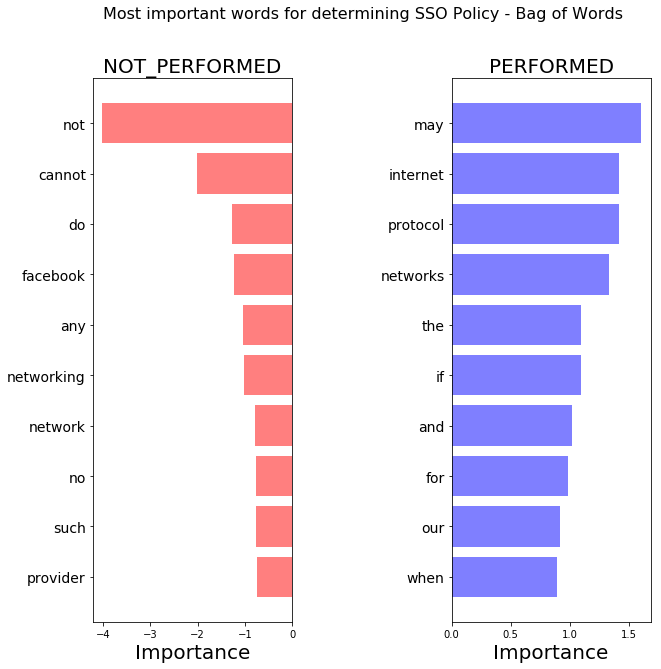

In [268]:
# get word importance
importance = get_most_important_features(count_vectorizer, clf, 10)

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for determining SSO Policy - Bag of Words")

## Preprocessing Unlabeled File for NLP

In [279]:
with open('../data/APP-350_v1.0/original_documents/1.html', 'r') as f:
    unl_sample = f.read()

In [329]:
def get_sentences_from_html(html):
    '''
    Clean-up raw html
    return a list of sentences
    '''
    soup = BeautifulSoup(html, 'html.parser')
    
    # kill all script and style elements
    for script in soup(['script', 'style']):
        script.decompose()    

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    sentences_all = text.split('\n')
    sentences = [sen for sen in sentences_all if len(sen)>100]
    
    return sentences

In [312]:
get_sentences_from_html(unl_sample)

['6677G PRIVACY POLICY',
 'PRIVACY POLICY',
 'This privacy policy (hereafter referred to as the "Privacy Policy") is applicable to our websites, apps and to all games and other activities(hereafter referred to as the “our products") that are offered by us on or through our products. Tiny Piece, having its registered office at Ajeltake Road, Ajeltake Island, Majuro, Republic of the Marshall Island MH 96960 (hereafter referred to as “6677g"). 6677g may use affiliates\' or reputable third parties\' services for the processing of personal data collected on or through our products. By using or accessing our products, you are accepting the practices described in this Privacy Policy.',
 '1. ABOUT OUR PRODUCTS',
 '1.1 Our products offer a diverse, current, and exciting mix of games created by 6677g, as well as games created by independent developers and 6677g partners. Players can access our products to play games without registering; however, they may choose to register to create a public or 

In [288]:
unl_sentences = unl_sample.split('\n')
sent_samp = unl_sentences[11]
sent_samp

''

In [296]:
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [321]:
import urllib

def get_html_from_url(url):
    #url = "http://www.cnn.com"
    html = urllib.request.urlopen(url).read()
    return html
    #soup = BeautifulSoup(html)

In [322]:
seriously_policy = get_html_from_url('http://www.seriously.com/privacy-notice/')

In [330]:
seriously_sentences = get_sentences_from_html(seriously_policy)

In [331]:
seriously_sentences

['Seriously respects your right to privacy.\xa0 This Privacy Notice explains who we are, how we collect, share and use personal information about you, and how you can exercise your privacy rights. This Privacy Notice applies to personal information that we collect through our games (“Games“) and website at https://bestfiends.com/ (“Website“) (together “Services”).',
 'If you have any questions or concerns about our use of your personal information, then please contact us using the contact details provided at the bottom of this Privacy Notice.',
 'We recommend that you read this Privacy Notice in full to ensure you are fully informed.\xa0 However, if you only want to access a particular section of this Privacy Notice, then you can click on the relevant link below to jump to that section.',
 'Seriously is a game development studio with offices in Helsinki, Finland and Los Angeles, CA, United States.',
 'For more information about Seriously, please see the Company section of our Website a

In [332]:
X_seriously = count_vectorizer.transform(seriously_sentences)

In [333]:
y_seriously = clf.predict(X_seriously)
y_seriously

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [305]:
#url = "http://www.cnn.com"
#html = urllib.urlopen(url).read()
#soup = BeautifulSoup(html)
soup = BeautifulSoup(unl_sample, 'html.parser')
# kill all script and style elements
for script in soup(["script", "style"]):
    script.decompose()    # rip it out

# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)
sent_list = text.split('\n')
print(sent_list[8])
#sent_list

2.1 When you visit our products, our servers automatically save your computer's IP address. IP addresses will be collected, along with information about the actual web pages that you visit on our products. If you arrive at our products via a link from another product, the URL of the linking product and the URL of any product that you link to next will also be collected.


In [308]:
X_oos = count_vectorizer.transform(sent_list)

In [309]:
y_oos_pred = clf.predict(X_oos)
y_oos_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [315]:
sum(y_oos_pred)>0

True

In [303]:
chunks

<generator object <genexpr> at 0x120a5f5c8>

In [284]:
standardize_text_str(sent_samp)

'<!doctype html public "-//w3c//dtd xhtml 1.0 transitional//en" "://www.w3.org/tr/xhtml1/dtd/xhtml1-transitional.dtd">'

In [297]:
soup = BeautifulSoup(unl_sample, 'html.parser')
soup_list = soup.text.split('\n')
soup_list

['',
 '',
 '',
 '',
 '6677G PRIVACY POLICY',
 '',
 '//<![CDATA[',
 'try{if (!window.CloudFlare) {var CloudFlare=[{verbose:0,p:0,byc:0,owlid:"cf",bag2:1,mirage2:0,oracle:0,paths:{cloudflare:"/cdn-cgi/nexp/dok3v=1613a3a185/"},atok:"b1d64847db7b456fb94950a2f0f03ad1",petok:"1202d7a0142e752b3bf36a0949b228d572ff55d2-1490033935-3600",adblock:1,betok:"b81b0d0731e65fd62b3f5ef8762aeae74c80369b-1490033935-120",zone:"6677g.com",rocket:"0",apps:0}];!function(a,b){a=document.createElement("script"),b=document.getElementsByTagName("script")[0],a.async=!0,a.src="//ajax.cloudflare.com/cdn-cgi/nexp/dok3v=f2befc48d1/cloudflare.min.js",b.parentNode.insertBefore(a,b)}()}}catch(e){};',
 '//]]>',
 '',
 '',
 '',
 'PRIVACY POLICY',
 '  This privacy policy (hereafter referred to as the "Privacy Policy") is applicable to our websites, apps and to all games and other activities(hereafter referred to as the “our products") that are offered by us on or through our products. Tiny Piece, having its registered office 